## Task 3. Artyom Novikov J41332c

### import all the packages 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from sklearn.model_selection import train_test_split 
%matplotlib inline


### Read the data

In [4]:
data = pd.read_csv("bioresponse.csv").values

In [5]:
data

array([[1.        , 0.        , 0.49700901, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.36666667, 0.60629148, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.0333    , 0.48012427, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.2       , 0.52056377, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.1       , 0.7656462 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.13333333, 0.53395198, ..., 0.        , 0.        ,
        0.        ]])

In [6]:
y = data[:,0]
X = data[:,1:]

X.shape

(3751, 1776)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test.shape 

(938, 1776)

### Implement the sigmoid function

In [8]:
# sigmoid

def sigmoid(z):
    #Compute the sigmoid of z. z is a scalar or numpy array of any size
    s = 1./(1.+np.exp(-z))
    
    return s 

In [9]:
print ("sigmoid([0, 2, 10, -10]) = " + str(sigmoid(np.array([0., 2., -2., 100.])))) 

sigmoid([0, 2, 10, -10]) = [0.5        0.88079708 0.11920292 1.        ]


### Initialize the model parameters

In [10]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [11]:
dim = 3
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]
 [0.]]
b = 0.0


### Forward and Backward propagation

Implementing a function `propagate()` that computes the cost function and its gradient.

Forward Propagation:
- Get X
- Compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- Calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas we  use: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [12]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [13]:
w, b, X, Y = np.array([[1.],[-1.]]), 4., np.array([[1.,5.,-1.],[10.,0.,-3.2]]), np.array([[0,1,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.0027004 ]
 [0.02446984]]
db = [0.00151471]
cost = [0.00295537]


### Optimization
- We have initialized the parameters.
- We are able to compute a cost function and its gradient.
- Now, we have to update the parameters using gradient descent, SGD and Adam optimizers from the previous lab.

For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

## GD optimizer

In [14]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
     
       # print("rand: ", rand_v)
       # print("X:", X[:,rand_v-1:rand_v])
      #  print("Y:", Y[:,rand_v-1:rand_v])
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

## SGD optimizer

In [15]:
def SGD(w, b, X, Y, num_iterations, learning_rate, print_cost = False, batch_size = 50):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        np.random.seed = 0
        rand_v = np.random.randint(0,len(Y[0]), len(Y[0]))
        np.random.shuffle(rand_v)
       # print("rand: ", rand_v)
       # print("X:", X[:,rand_v-1:rand_v])
      #  print("Y:", Y[:,rand_v-1:rand_v])
        grads, cost = propagate(w,b,X[:,rand_v[:batch_size]],Y[:,rand_v[:batch_size]])
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        print(w)
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


## Adam Oprimizer

In [39]:
def Adam(w, b, X, Y, num_iterations = 20, learning_rate = 0.01, print_cost = False,  beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    m_dw, v_dw = np.zeros(w.shape[1]),np.zeros(w.shape[1])
    m_db, v_db =  np.zeros(w.shape[1]), np.zeros(w.shape[1])
    
   # m_dw, v_dw = 0,0
  #  m_db, v_db = 0,0
    
    for i in range(1,num_iterations):
                
        # Cost and gradient calculation 
     
       # print("rand: ", rand_v)
       # print("X:", X[:,rand_v-1:rand_v])
      #  print("Y:", Y[:,rand_v-1:rand_v])
       
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
      
        m_dw = beta1*m_dw + (1-beta1)*dw
      #  print(m_dw)
        # *** biases *** #
        m_db = beta1*m_db + (1-beta1)*db

        ## rms beta 2
        # *** weights *** #
        v_dw = beta2*v_dw + (1-beta2)*(dw**2)
       # print(v_dw)
        # *** biases *** #
        v_db = beta2*v_db + (1-beta2)*(db**2)

        ## bias correction
        m_dw_corr = m_dw/(1-beta1**i)
        m_db_corr = m_db/(1-beta1**i)
        v_dw_corr = v_dw/(1-beta2**i)
        v_db_corr = v_db/(1-beta2**i)

        
        ## update weights and biases
        w -=  learning_rate*(m_dw_corr/(np.sqrt(v_dw_corr)+epsilon))
        b -=  learning_rate*(m_db_corr/(np.sqrt(v_db_corr)+epsilon))
        
       
#         # update rule
#         w -=learning_rate*dw
#         b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs 

In [17]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 1000, learning_rate = 0.005, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 0.002955
Cost after iteration 100: 0.002683
Cost after iteration 200: 0.002461
Cost after iteration 300: 0.002278
Cost after iteration 400: 0.002124
Cost after iteration 500: 0.001991
Cost after iteration 600: 0.001877
Cost after iteration 700: 0.001777
Cost after iteration 800: 0.001689
Cost after iteration 900: 0.001611
w = [[ 0.99092423]
 [-1.08149946]]
b = [3.99591156]
dw = [[0.00128065]
 [0.01144573]]
db = [0.00041775]


In [18]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [19]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [20]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False, method = "GD", batch_size = 50):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    if method == "GD":
        parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    elif method == "SGD":
        parameters, grads, costs = SGD(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost, batch_size = 50)
    elif method == "Adam":
        parameters, grads, costs = Adam(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
        print(grads)
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [21]:
"""from sklearn import datasets
from sklearn.model_selection import train_test_split
X, y = datasets.make_moons(200, noise=0.20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)"""

'from sklearn import datasets\nfrom sklearn.model_selection import train_test_split\nX, y = datasets.make_moons(200, noise=0.20)\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)'

### GD model with different learning rates

In [22]:
print("Learning Rate = 0.001")
model_0001 = model(X_train.T,y_train.reshape(1,-1), X_test.T, y_test.reshape(1,-1), learning_rate = 0.001 ).copy()
print("Learning Rate = 0.005")
model_0005 = model(X_train.T,y_train.reshape(1,-1), X_test.T, y_test.reshape(1,-1), learning_rate = 0.005 ).copy()
print("Learning Rate = 0.01")
model_001 = model(X_train.T,y_train.reshape(1,-1), X_test.T, y_test.reshape(1,-1), learning_rate = 0.01 ).copy()
print("Learning Rate = 0.1")
model_05 = model(X_train.T,y_train.reshape(1,-1), X_test.T, y_test.reshape(1,-1), learning_rate = 0.1 ).copy()
print("Learning Rate = 0.5")
model_01 = model(X_train.T,y_train.reshape(1,-1), X_test.T, y_test.reshape(1,-1), learning_rate = 0.5 ).copy()

Learning Rate = 0.001
train accuracy: 72.52044081052257 %
test accuracy: 72.70788912579957 %
Learning Rate = 0.005
train accuracy: 77.10629221471739 %
test accuracy: 74.73347547974413 %
Learning Rate = 0.01
train accuracy: 78.35051546391753 %
test accuracy: 75.5863539445629 %
Learning Rate = 0.1
train accuracy: 83.32740846071809 %
test accuracy: 76.43923240938166 %
Learning Rate = 0.5
train accuracy: 83.82509776039815 %
test accuracy: 72.92110874200426 %


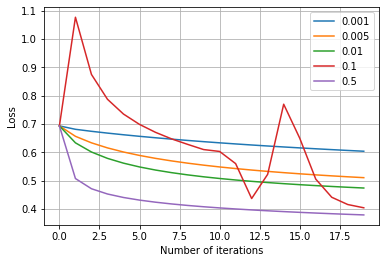

In [23]:
plt.plot(np.asarray(model_0001['costs']).ravel(), label = "0.001")
plt.plot(np.asarray(model_0005['costs']).ravel(), label = "0.005")
plt.plot(np.asarray(model_001['costs']).ravel(), label = "0.01")
plt.plot(np.asarray(model_01['costs']).ravel(), label = "0.1")
plt.plot(np.asarray(model_05['costs']).ravel(), label = "0.5")
plt.xlabel("Number of iterations")
plt.rcParams["figure.figsize"] = (15,7)
plt.ylabel("Loss")
plt.grid()
plt.legend()

### SGD model with different learning rates

In [24]:
print("Learning Rate = 0.001")
model_sgd_0001 = model(X_train.T,y_train.reshape(1,-1), X_test.T, y_test.reshape(1,-1), method = "SGD", learning_rate = 0.001, batch_size = 200 ).copy()
print("Learning Rate = 0.005")
model_sgd_0005 = model(X_train.T,y_train.reshape(1,-1), X_test.T, y_test.reshape(1,-1), method = "SGD", learning_rate = 0.005 , batch_size = 200).copy()
print("Learning Rate = 0.01")
model_sgd_001 = model(X_train.T,y_train.reshape(1,-1), X_test.T, y_test.reshape(1,-1), method = "SGD", learning_rate = 0.01 , batch_size = 200).copy()
print("Learning Rate = 0.1")
model_sgd_01 = model(X_train.T,y_train.reshape(1,-1), X_test.T, y_test.reshape(1,-1), method = "SGD", learning_rate = 0.1 , batch_size = 200).copy()
print("Learning Rate = 0.5")
model_sgd_05 = model(X_train.T,y_train.reshape(1,-1), X_test.T, y_test.reshape(1,-1), method = "SGD", learning_rate = 0.5 , batch_size = 200).copy()

Streaming output truncated to the last 5000 lines.
[[-0.0606204 ]
 [ 0.18852073]
 [ 0.16016736]
 ...
 [ 0.03760047]
 [ 0.08144965]
 [ 0.05288526]]
[[-0.05724933]
 [ 0.22627242]
 [ 0.16102927]
 ...
 [ 0.03778929]
 [ 0.08144965]
 [ 0.05390059]]
[[-0.06702303]
 [ 0.16312166]
 [ 0.15356222]
 ...
 [ 0.03778943]
 [ 0.08144965]
 [ 0.05390059]]
[[-0.06171875]
 [ 0.20978912]
 [ 0.16092314]
 ...
 [ 0.03778479]
 [ 0.08145406]
 [ 0.05475872]]
[[-0.06454613]
 [ 0.16298599]
 [ 0.15737728]
 ...
 [ 0.03778479]
 [ 0.08145408]
 [ 0.05475872]]
[[-0.06212979]
 [ 0.19974761]
 [ 0.16155765]
 ...
 [ 0.03778479]
 [ 0.08145408]
 [ 0.05475872]]
[[-0.06717404]
 [ 0.15950021]
 [ 0.15674355]
 ...
 [ 0.03778479]
 [ 0.08145408]
 [ 0.05475872]]
[[-0.06028823]
 [ 0.20659451]
 [ 0.16512284]
 ...
 [ 0.03970206]
 [ 0.08011456]
 [ 0.05801552]]
[[-0.06841105]
 [ 0.13979555]
 [ 0.15509948]
 ...
 [ 0.03970206]
 [ 0.07155223]
 [ 0.05801552]]
[[-0.05511119]
 [ 0.24180281]
 [ 0.17190016]
 ...
 [ 0.03970206]
 [ 0.07155223]
 [ 0.

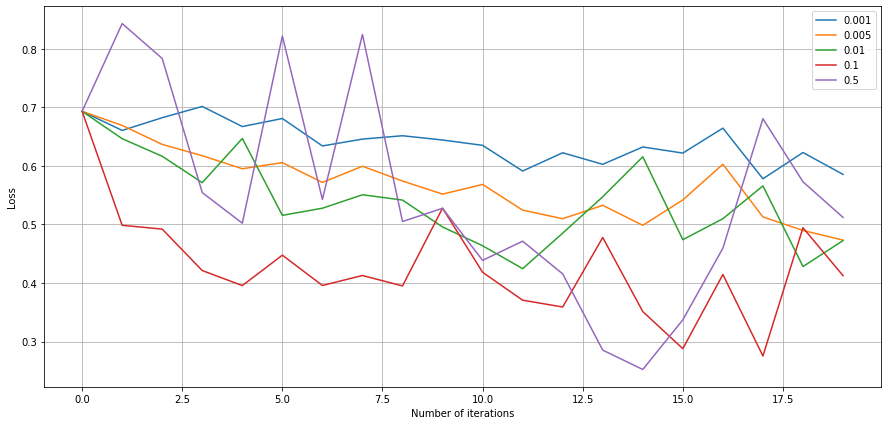

In [25]:
plt.plot(np.asarray(model_sgd_0001['costs']).ravel(), label = "0.001")
plt.plot(np.asarray(model_sgd_0005['costs']).ravel(), label = "0.005")
plt.plot(np.asarray(model_sgd_001['costs']).ravel(), label = "0.01")
plt.plot(np.asarray(model_sgd_01['costs']).ravel(), label = "0.1")
plt.plot(np.asarray(model_sgd_05['costs']).ravel(), label = "0.5")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.rcParams["figure.figsize"] = (15,7)
plt.grid()
plt.legend()

### Adam mmodel with different learning rates

In [41]:
model_adam_0005 = model(X_train.T,y_train.reshape(1,-1), X_test.T, y_test.reshape(1,-1), learning_rate = 0.005, method = "Adam").copy()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


{'dw': array([[ 1.28397792e-05],
       [-2.39002545e-05],
       [-1.03949352e-06],
       ...,
       [-2.49134217e-07],
       [-3.97979015e-06],
       [-3.72880016e-06]]), 'db': array([-1.82497255e-05])}
train accuracy: 94.02772840383932 %
test accuracy: 73.56076759061834 %


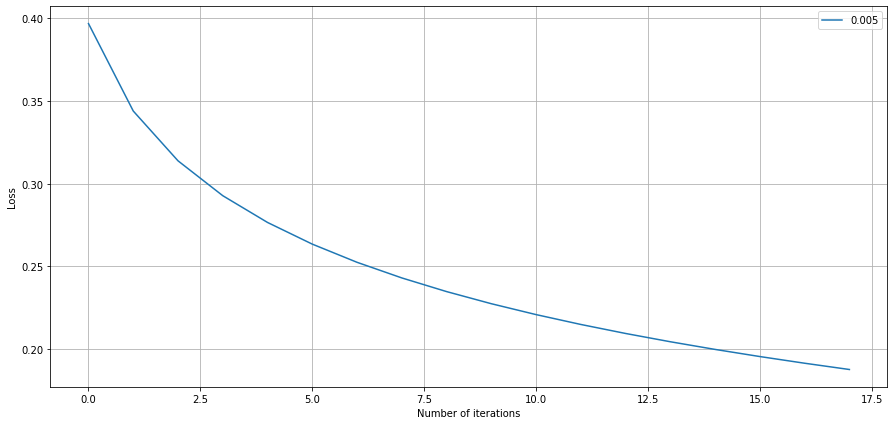

In [42]:
plt.plot(np.asarray(model_adam_0005['costs']).ravel(), label = "0.005")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.rcParams["figure.figsize"] = (15,7)
plt.grid()
plt.legend()

### As we can see all the models show almost the same results.

Increasing the learning rate can improve the results of the model, but if the learning rate is too big, accuracy of the model starts decreasing
Oprimal LR according to the results is  0.001 < lr <0.01


### Comparison of different methods 

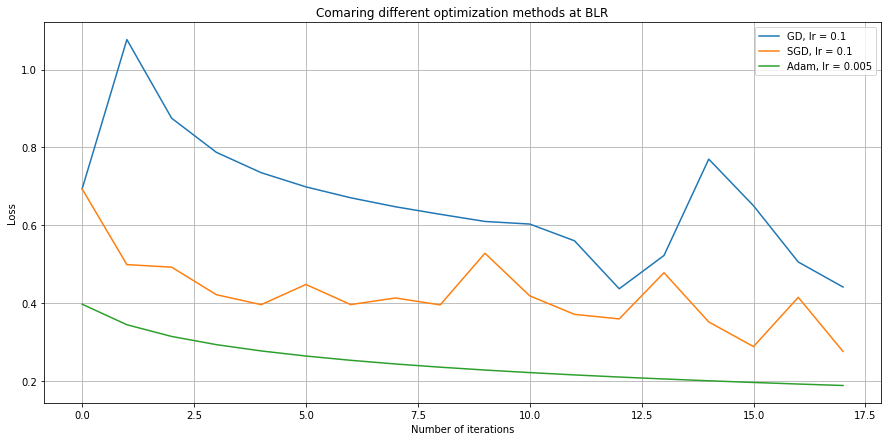

In [43]:
plt.plot(np.asarray(model_01['costs']).ravel()[:-2], label = "GD, lr = 0.1")
plt.plot(np.asarray(model_sgd_01['costs']).ravel()[:-2], label = "SGD, lr = 0.1")
plt.plot(np.asarray(model_adam_0005['costs']).ravel(), label = "Adam, lr = 0.005")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.title("Comaring different optimization methods at BLR")
plt.grid()
plt.rcParams["figure.figsize"] = (15,7)
plt.legend()